<a href="https://colab.research.google.com/github/KhansaKhanam/Predictive-Analytics/blob/main/PrincipleComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis:**

*Dimentionality Reduction* is a crucial step in machine learning and data analytics where we reduce the number of components in the database in a way that the reduced number of components can retain the most important information about the dataset.

### **Benefits of Dimentionality Reduction:**
* Prevent overfitting
* Simplify problem
* Reduce computational effeciency

# Importing all the required libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
wine = pd.read_csv('wine.csv')
wine.head(10)

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,A,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,A,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,A,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,A,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,A,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [115]:
wine.iloc[:,1:].describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [116]:
wine.isnull().sum()

,0
Type,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcalinity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0


Visualization:

# Standardizing numerical data for better analysis

In [117]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [118]:
x = wine.drop('Type', axis=1)
y = wine['Type']

In [119]:
x = scalar.fit_transform(x)
x = pd.DataFrame(x, columns=wine.columns[1:])
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Visual Representation of Numeric Data

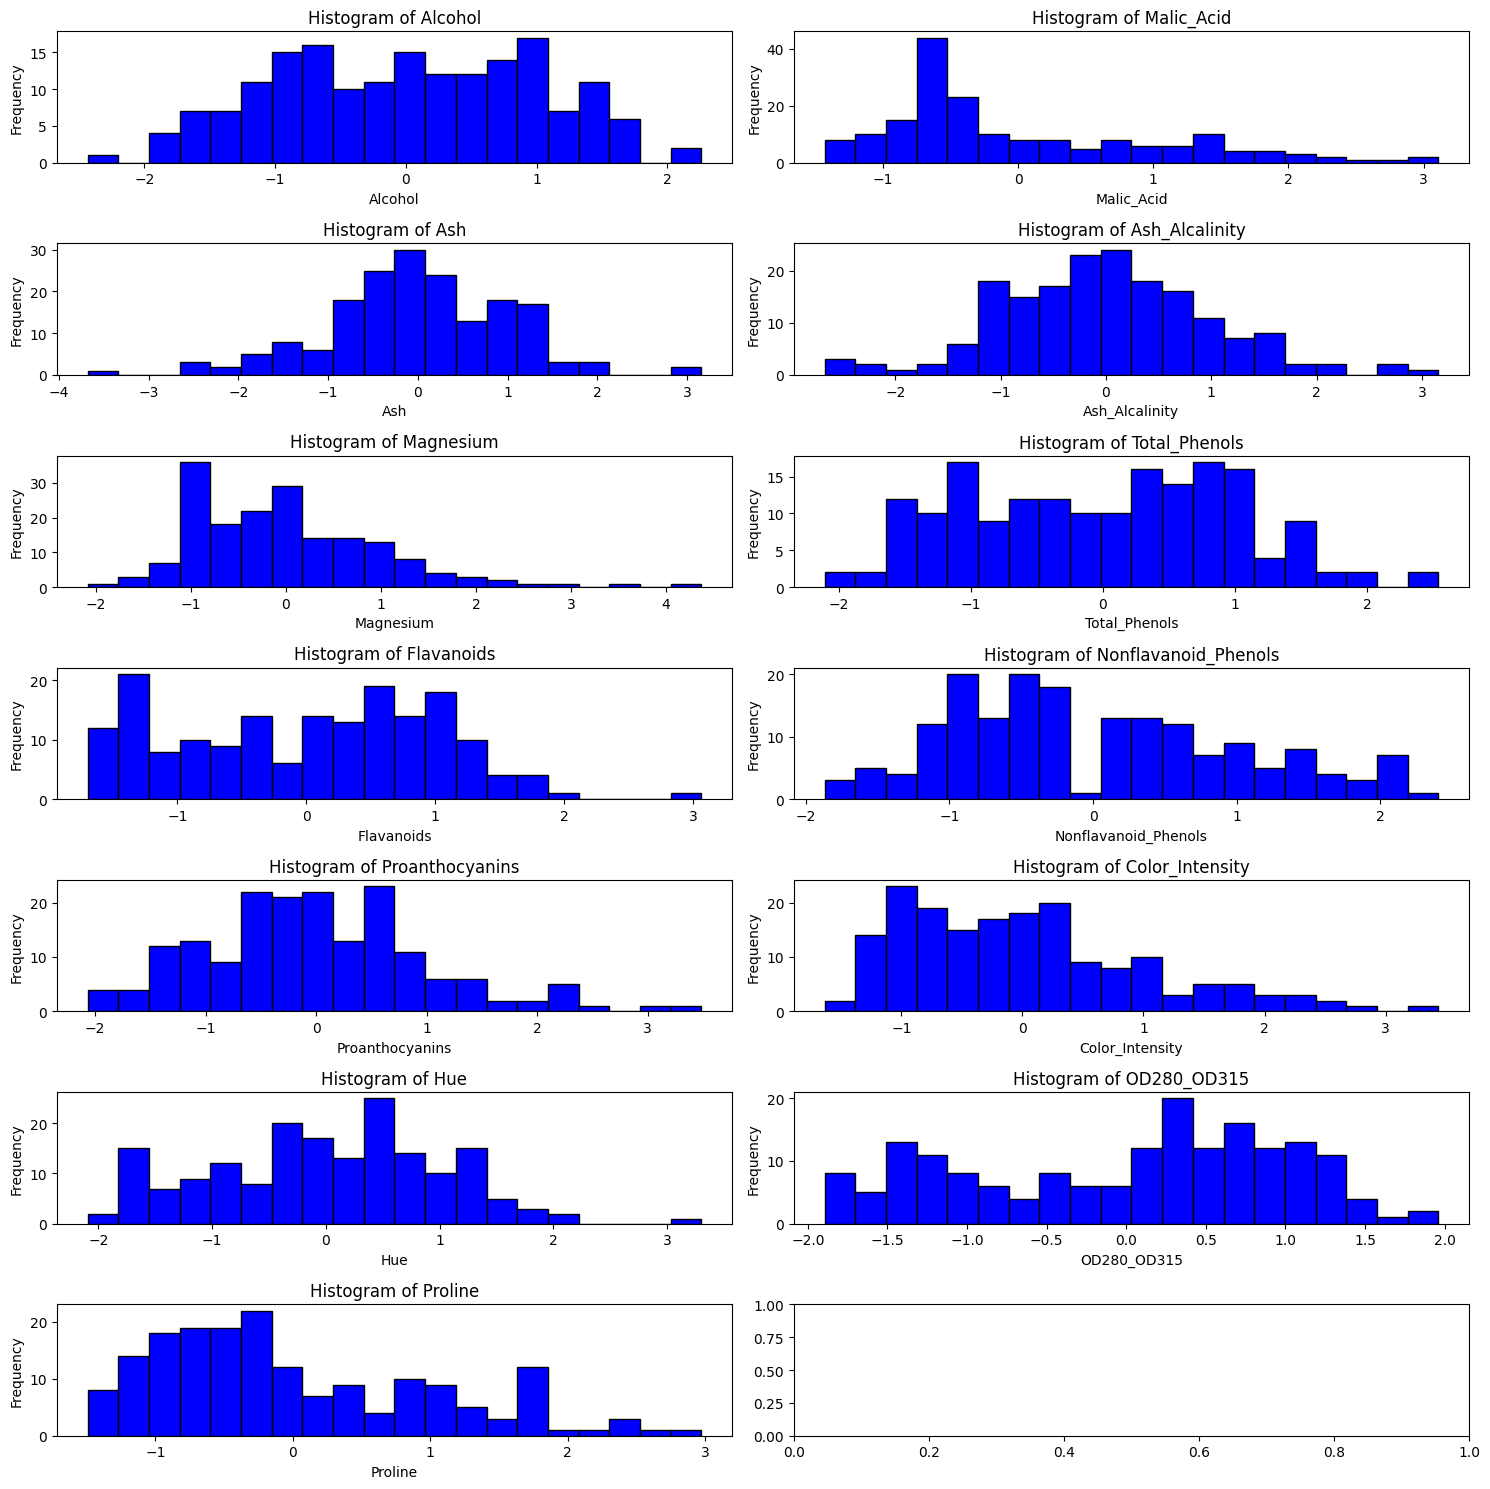

In [120]:
groupwine = x.groupby(y).mean()

num_cols = len(groupwine.columns)

fig, axes = plt.subplots(7,2, figsize=(15, 15))
axes = axes.flatten()

for i, c in enumerate(groupwine.columns[:]):
    axes[i].hist(x[c], bins=20, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Principal Component Analysis (PCA)** is a popular dimensionality reduction technique that aims to transform a high-dimensional dataset into a lower-dimensional space while retaining most of the information. PCA works by identifying the directions that capture the most variation in the data and projecting the data onto those directions, which are called principal components.

However, when we apply PCA, it is often important to understand how much of the variation in the data is explained by each principal component. This is where the concept of **“explained variance”** comes in. Explained variance measures the proportion of variance in the data that is explained by each principal component.



In [121]:
from sklearn.decomposition import PCA

pca = PCA()
x_ = pca.fit(x)

**Explained variance** is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method.

In other words, it tells us how much of the total variance is “explained” by each component. This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis.

In [122]:
x_.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

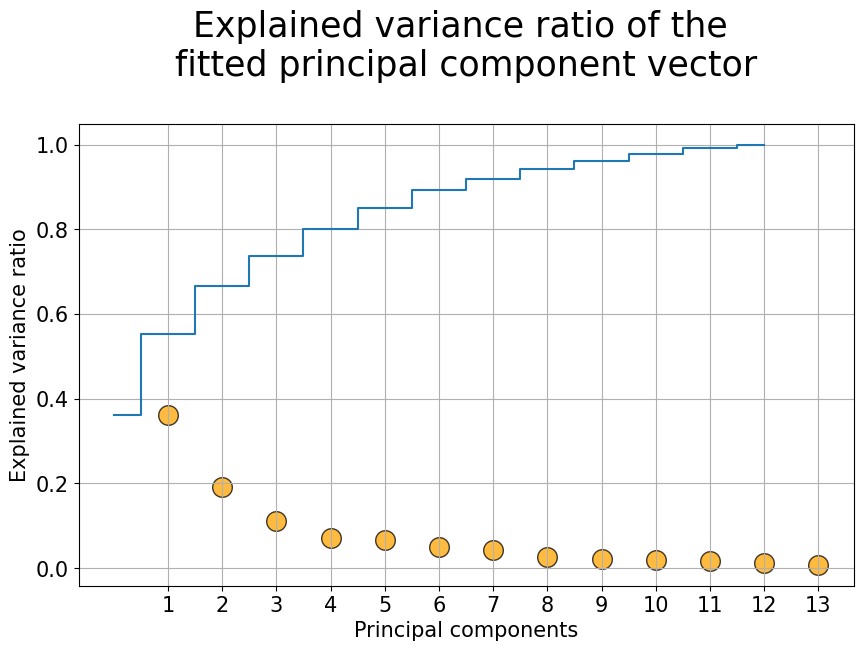

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(x_.explained_variance_ratio_))],
            y=x_.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)

# Step plot is used to represent the variance explained by different principal components.
plt.step(range(0,len(np.cumsum(x_.explained_variance_ratio_))), np.cumsum(x_.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(x_.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the principal component explains about 36% of the total variance in the data and the component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

**Components** in Principal Component Analysis (PCA) refers to the principal axes in feature space, representing the directions of maximum variance in the data. These components are the basis vectors of the transformed feature space after PCA is applied, and each component is a linear combination of the original features.

In [124]:
x_c = pca.components_
print(x_c)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [ 0.21353865  0.53681385  0.15447466 -0.10082451  0.03814394 -0.0841223
  -0.01892002 -0.25859401 -0.53379539 -0.41864414  0.10598274  0.26585107
   0.11972557]
 [-0.05639636  0.420523

In [125]:
for i, component in enumerate(x_c[:5], start=1):
    print(f"Principal Component {i}: {component}")

Principal Component 1: [ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]
Principal Component 2: [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]
Principal Component 3: [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
  0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
 -0.12674592]
Principal Component 4: [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
  0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
 -0.23207086]
Principal Component 5: [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
 -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
 -0.1578688 ]


### References:
* [PCA Explained Variance Concepts with Python Example](https://vitalflux.com/pca-explained-variance-concept-python-example/)
* [Understanding Principal Component Analysis (PCA)](https://medium.com/@noorulhudaajmal12/understanding-principal-component-analysis-pca-f831f0ce08c5)